<a href="https://colab.research.google.com/github/Tor902/ML-side-project/blob/main/HandsOnMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Titanic***  
 


# Problem definition  
Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.




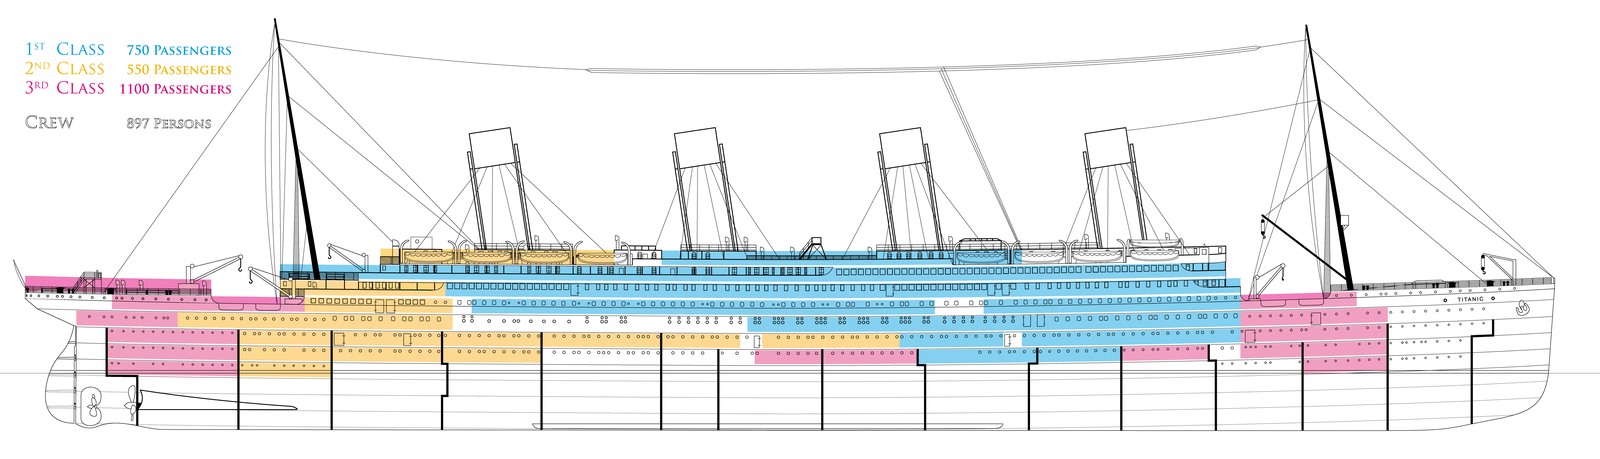

# Imports

In [1]:
  # import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# sklearn imports

import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 30
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (30, 8)
plt.rcParams["legend.title_fontsize"] = 20


# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
!pip install --upgrade plotly

# Data Exploration

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
train_and_test = [df_train, df_test]

In [4]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**data types:**  
we can see that there are multiple data types in our Dataset:  
* String / char  
* float / int  
* Mixed (Ticket) 
* Boolean (**Survived**) 
* NaN

## Data Descriptions
**Survival**: 0 = No, 1 = Yes

**pclass** **(Ticket class)**: 1 = 1st, 2 = 2nd, 3 = 3rd

**sex**: Sex

**Age**: Age in years

**sibsp**: number of siblings/spouses aboard the Titanic

**parch**: number of parents/children aboard the Titanic

**ticket**: Ticket number

**fare**: Passenger fare

**cabin**: Cabin number

**embarked**: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**View numerical features statistic information**
* 38.3% passengers survived
* Most passengers were under the Age of 38
* Most passengers traveled without children
* Most passengers traveled in couples

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Which features contain NaN values?**  
Will be corrected in future steps  
* Age
* Cabin
* Embarked

In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

looks like the 'PassengerId' column is redundent so ill drop it

In [9]:
df_train = df_train.drop('PassengerId', axis=1)
test_passengerId = df_test['PassengerId'].copy()
df_test = df_test.drop('PassengerId', axis=1)
train_and_test = [df_train, df_test]

# Deal with Missing values

### **Age:**  
Fill accorrding to a normal distribution based on exsisting values.

In [10]:
mean = df_train.Age.mean()
std = df_train.Age.std()

for df in train_and_test:
  null_count = df.Age.isnull().sum()
  random_age = np.random.normal(loc=mean, scale=std, size=null_count)
  age_vec = df.Age.copy()
  age_vec[np.isnan(age_vec)] = random_age
  df['Age'] = age_vec
  df['Age'] = df['Age'].astype(int)
train_and_test = [df_train, df_test]



In [11]:
print(train_and_test)

[     Survived  Pclass  ... Cabin Embarked
0           0       3  ...   NaN        S
1           1       1  ...   C85        C
2           1       3  ...   NaN        S
3           1       1  ...  C123        S
4           0       3  ...   NaN        S
..        ...     ...  ...   ...      ...
886         0       2  ...   NaN        S
887         1       1  ...   B42        S
888         0       3  ...   NaN        S
889         1       1  ...  C148        C
890         0       3  ...   NaN        Q

[891 rows x 11 columns],      Pclass                                          Name  ... Cabin  Embarked
0         3                              Kelly, Mr. James  ...   NaN         Q
1         3              Wilkes, Mrs. James (Ellen Needs)  ...   NaN         S
2         2                     Myles, Mr. Thomas Francis  ...   NaN         Q
3         3                              Wirz, Mr. Albert  ...   NaN         S
4         3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  ...   NaN      

### **Cabin & Ticket:**

**Cabin:**  
Although the first letter in each Cabin may give information, I will drop it because it has around 80% missing data.  

**Ticket:**  
Complex feature with several datatypes combined, I will drop it and may revisit it later.





In [12]:
df_train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [13]:
df_train = df_train.drop(['Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Ticket','Cabin'], axis=1)
train_and_test = [df_train, df_test]

### **Embarked:**  
The most common value is 'S' out of a group of total 3 values.  
Because there are only 2 missing values therefore we can fill the common value in both of them.

In [14]:
df_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
common_value = 'S'
df_train['Embarked'] = df_train['Embarked'].fillna(common_value)
df_test['Embarked'] = df_test['Embarked'].fillna(common_value)
train_and_test = [df_train, df_test]

## **Fare** (test only)

In [16]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
train_and_test = [df_train, df_test]

# Data Visualization

## Survivers:  
**0** = did not survive  
**1** = *survived*  
* 38% Survivors out of 891 samples

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


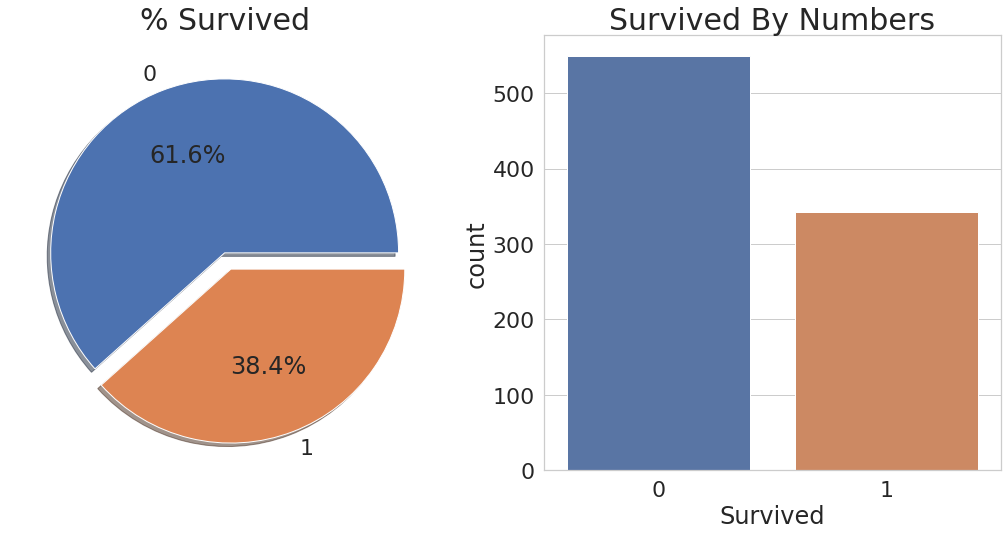

In [17]:
sns.set_theme(style="whitegrid", color_codes=True, font_scale=2)
fig , ax = plt.subplots(1, 2, figsize = (18,8))
fig.patch.set_alpha(0)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Survived', fontsize = 30)
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,x=ax[1])
ax[1].set_title('Survived By Numbers',  fontsize = 30)
plt.show()

## Survivers Per Class:  
* 55% of the passengers were in the 3rd class and only a small number of them survived.
* Most of the 1st class survived.  
* The Survivors in the 2nd class is around 50%

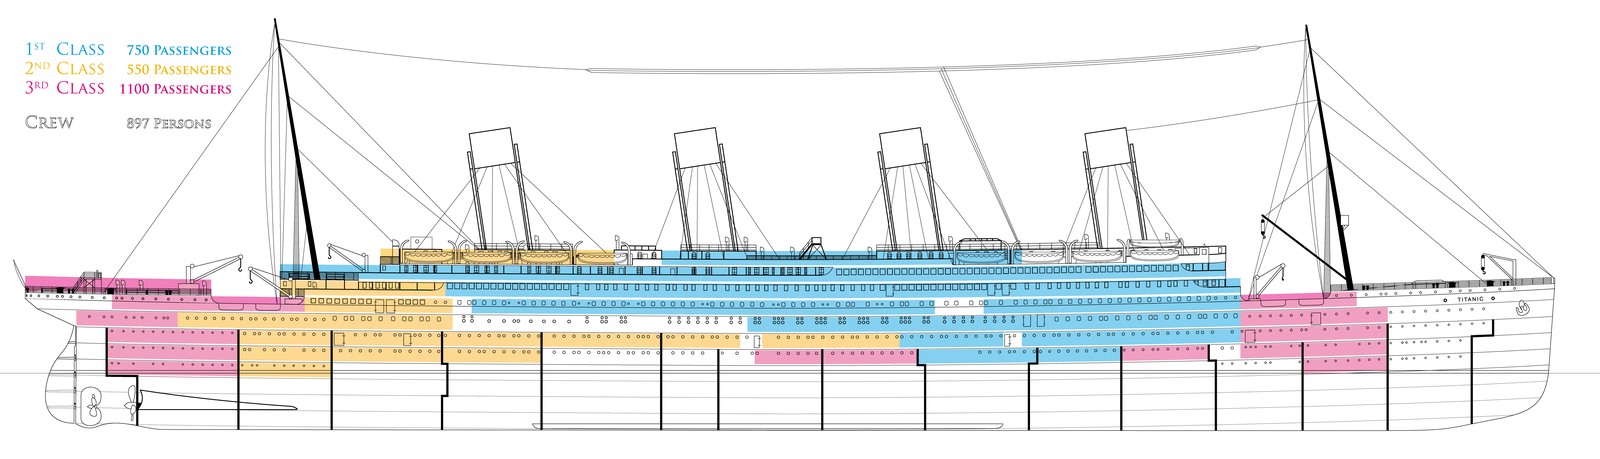

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


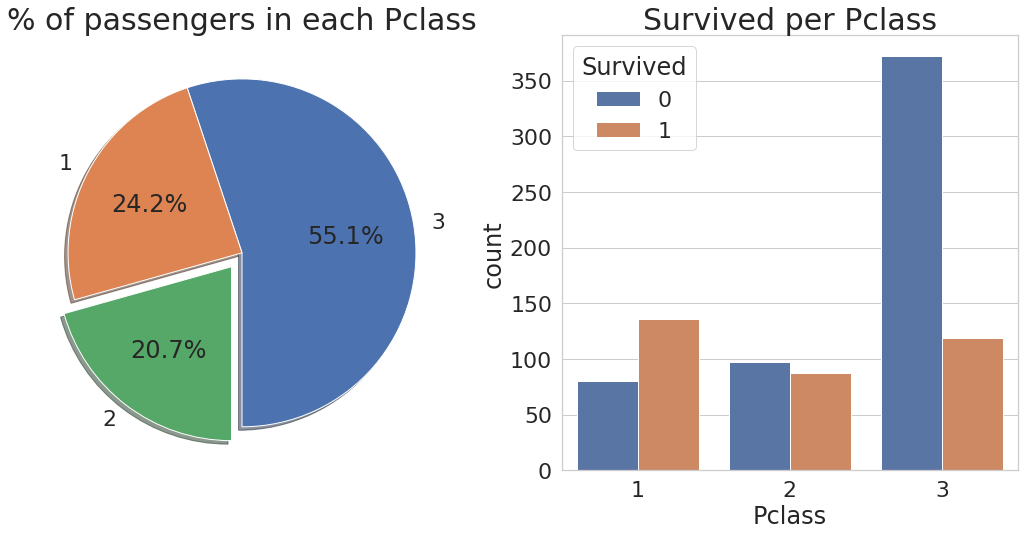

In [18]:
fig , ax = plt.subplots(1, 2, figsize = (18,8))
fig.patch.set_alpha(0)
df_train['Pclass'].value_counts().plot.pie(explode=[0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=270)
ax[0].set_title('% of passengers in each Pclass', fontsize = 30)
ax[0].set_ylabel('')

sns.countplot('Pclass',data=df_train,x=ax[1],hue = 'Survived' )
ax[1].set_title('Survived per Pclass',fontsize = 30)
plt.show()

## Survivers By Sex For each Class:  
* Females had a better chance of survival in all classes  
this might be a good corrolation with Survive feature

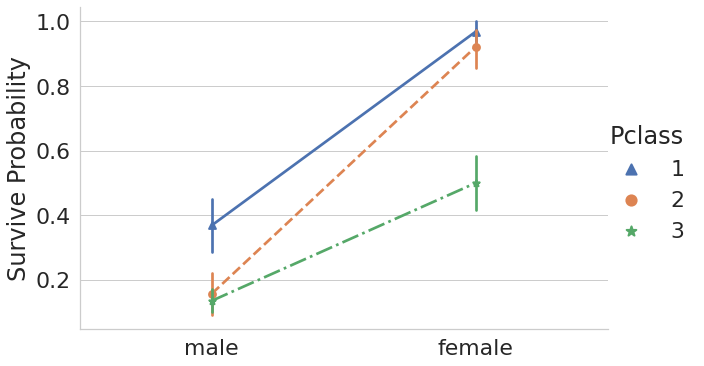

In [19]:
ax = sns.catplot(x="Sex", y="Survived", hue="Pclass", markers=["^", "o","*"], linestyles=["-", "--","dashdot"],
            kind="point", data=df_train, height=6,palette='deep',aspect=12/8)
ax.set(xlabel='',ylabel='Survive Probability')

## Survivers Per Age:
* Only few old (40+) passengers survived
* Most of the survivors were of Age 20-40

([<matplotlib.patches.Wedge at 0x7f6644a41550>,
 [Text(1.011367040167134, -0.4325930074140947, '40+'),
  Text(-1.103309498364146, 0.4719196444517398, 'Under 40')],
 [Text(0.551654749182073, -0.2359598222258698, '20%'),
  Text(-0.6435972073790852, 0.27528645926351486, '80%')])

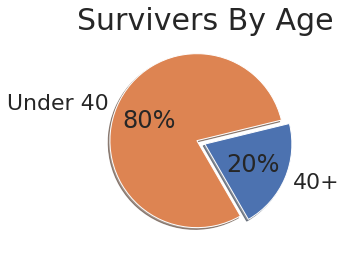

In [20]:
labels = ["40+","Under 40"]
old_survivers =len(df_train.loc[(df_train.Age >= 40)& (df_train.Survived == 1) ])
young_survivers = len(df_train.loc[(df_train.Age < 40) & (df_train.Survived == 1) ])

sizes = [old_survivers,young_survivers]
fig1, ax = plt.subplots()
ax.set_title('Survivers By Age', fontsize = 30)
ax.pie(sizes, labels=labels,explode=[0,0.1],autopct='%1.0f%%',shadow=True,startangle=300)

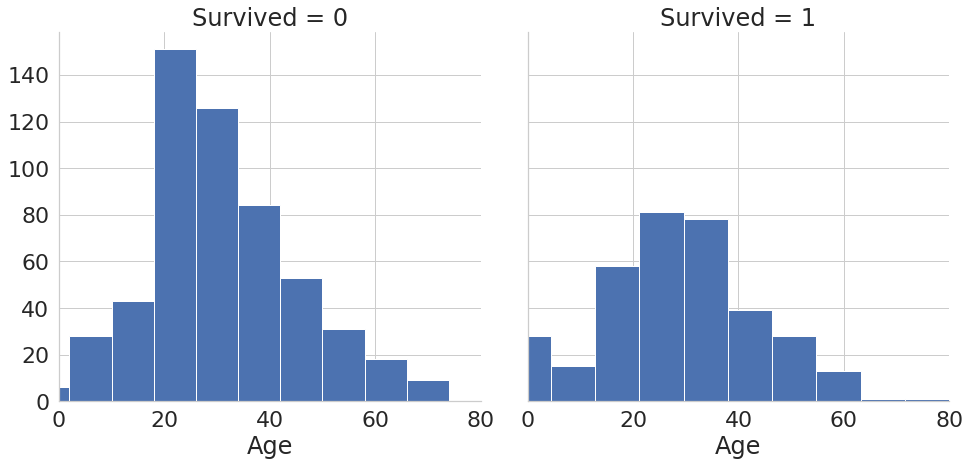

In [21]:
grid = sns.FacetGrid(df_train, col='Survived', height=7, aspect=1, xlim=(0,80))
grid.map(plt.hist, 'Age', bins=10)

## Survivers Per Family on board:
**merge the SibSp and Parch features to A more general feature FamilyOnBoard**  
* looks like if someone had a memmber or two of family on board hes more likly to *survive*

In [22]:
df_train['FamilyOnBoard'] = df_train['SibSp'] + df_train['Parch']
df_train = df_train.drop(['SibSp' ,'Parch'], axis=1)

df_test['FamilyOnBoard'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['SibSp' ,'Parch'], axis=1)

train_and_test = [df_train, df_test]

In [23]:
df_train.FamilyOnBoard.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilyOnBoard, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


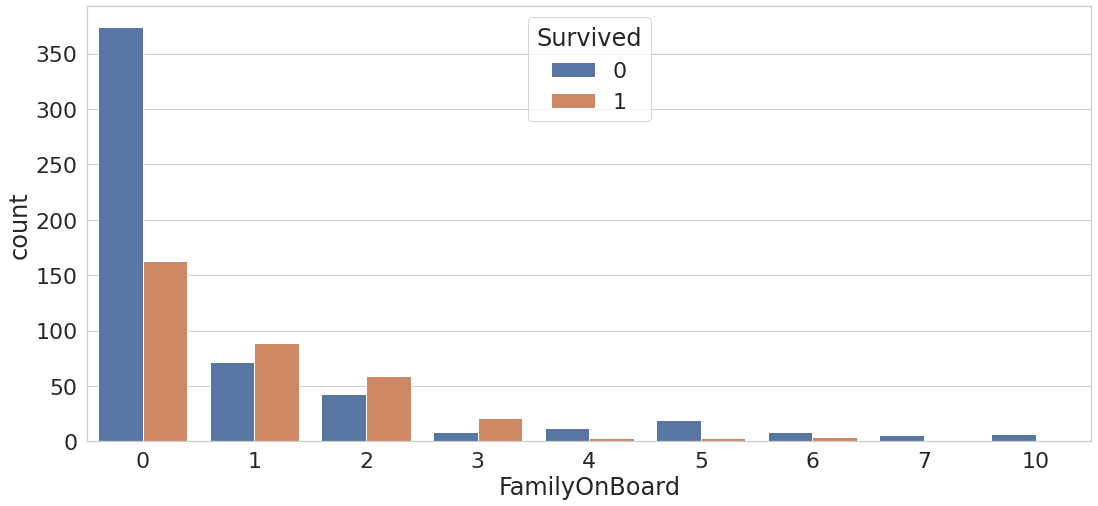

In [24]:
fig , ax = plt.subplots(1, 1, figsize = (18,8))
sns.countplot('FamilyOnBoard',data=df_train, x=ax, hue = 'Survived')
plt.show()

## Survivers per gate Embarked:
* most of the passengers embarked on gate S
* gate S has the lowest chance of survival when comparing to gates C and Q

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


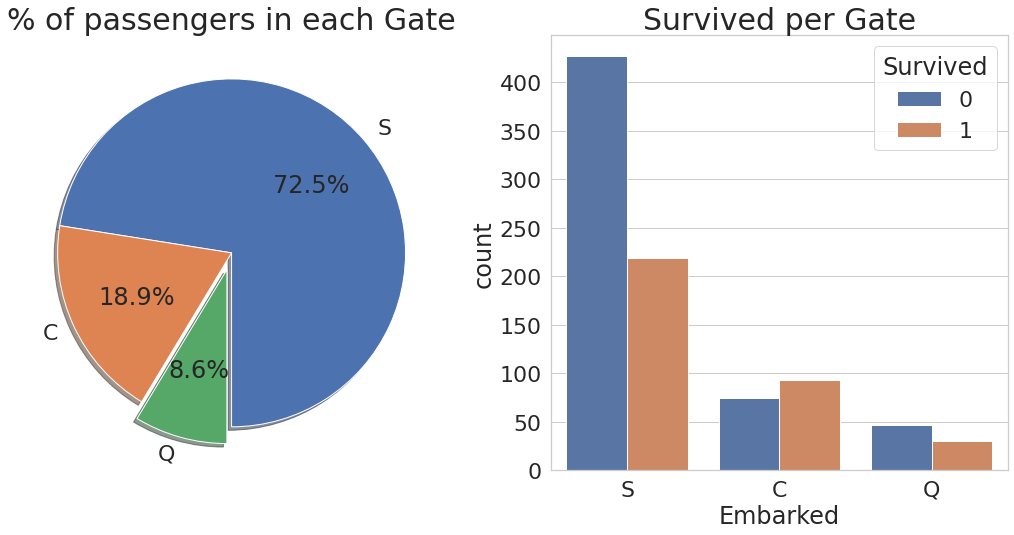

In [25]:
fig , ax = plt.subplots(1, 2, figsize = (18,8))
fig.patch.set_alpha(0)
df_train['Embarked'].value_counts().plot.pie(explode=[0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=270)
ax[0].set_title('% of passengers in each Gate', fontsize = 30)
ax[0].set_ylabel('')
sns.countplot('Embarked',data=df_train,x=ax[1],hue = 'Survived' )
ax[1].set_title('Survived per Gate',fontsize = 30)
plt.show()

## Correlations

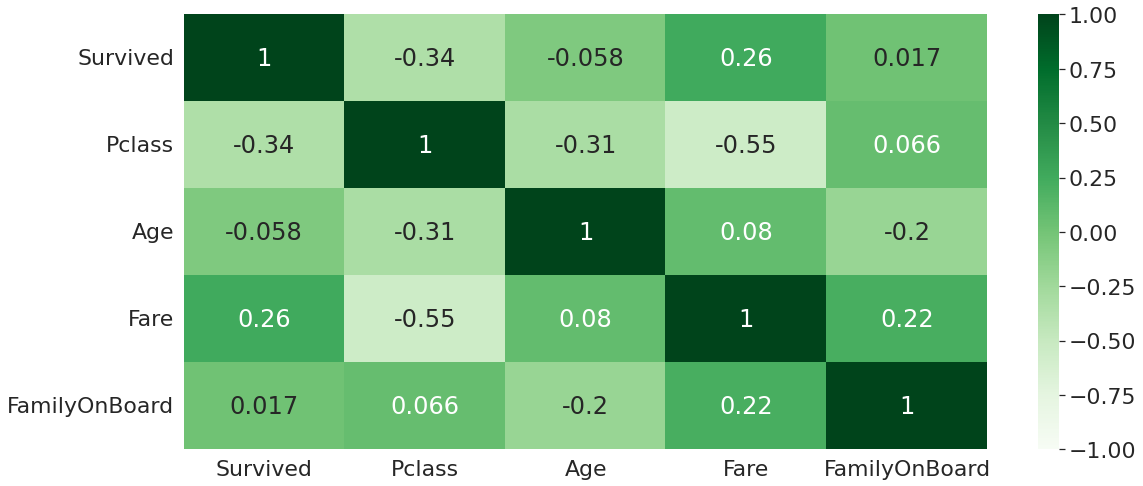

In [26]:
cor = df_train.corr()
fig , ax = plt.subplots(1, 1, figsize = (18,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

**The features has low correlation that means we wont drop any of them and they all might contribute to the model**

# Devide into Numerical and Categorial groups

In [27]:
def split_numeric_categorial(df):
  numerical_df = df.select_dtypes(exclude='object')
  numerical_df = numerical_df.astype('float64')
  categorial_df = df.select_dtypes(include='object')
  return (numerical_df, categorial_df)

In [28]:
train_numerical_df, train_categorial_df = split_numeric_categorial(df_train)
test_numerical_df, test_categorial_df = split_numeric_categorial(df_test)

categorial_df = [train_categorial_df, test_categorial_df]

### Handle Categorial features

In [29]:
categorial_df_noName =[]
for cat_df in categorial_df:
  cat_df = cat_df.drop('Name', axis=1)
  categorial_df_noName.append(cat_df)
categorial_df = categorial_df_noName.copy()

In [30]:
transformed_cat_df = []
for cat_df in categorial_df:
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
  cat_df = np.array(ct.fit_transform(cat_df))
  cat_df = pd.DataFrame(cat_df)
  transformed_cat_df.append(cat_df)

categorial_df = transformed_cat_df.copy()



### Handle Numerical features

In [31]:
t = df_train['Survived']
train_numerical_df = train_numerical_df.drop('Survived', axis=1)

train_numerical_array = train_numerical_df.to_numpy()
test_numerical_array = test_numerical_df.to_numpy()

sc = StandardScaler()
train_numerical_array[:, 0:2] = sc.fit_transform(train_numerical_array[:,  0:2])
test_numerical_array[:, 0:2] = sc.transform(test_numerical_array[:, 0:2])

numerical_df = [pd.DataFrame(train_numerical_array), pd.DataFrame(test_numerical_array)]

In [32]:
df_train = pd.concat([numerical_df[0], categorial_df[0]], axis=1, join='inner')
df_test = pd.concat([numerical_df[1], categorial_df[1]], axis=1, join='inner')

In [33]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [34]:
# plot the score by split and the loss by split
def plot_loss_by_split(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42)
        MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000, random_state=2).fit(X_train,t_train)
        y_train = MLP_cls.predict(X_train)
        y_val = MLP_cls.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
    print_graphs_mse(graph_points)



In [35]:
X = df_train.to_numpy() 
plot_loss_by_split(X, t)

**Best split observed is 0.2**

In [36]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.2, random_state=42)

## Check SGD hyper-parameters

In [46]:
def plot_loss_by_eta0(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    }
    for eta in range(1, 100,3):
        SGD_model = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=eta/1000, random_state=42).fit(X_train, t_train)
        y_train = SGD_model.predict(X_train)
        y_val = SGD_model.predict(X_val)
        graph_points['train_MSE'][eta/1000] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][eta/1000] = metrics.mean_squared_error(t_val, y_val)
    print_graphs_mse(graph_points)

In [47]:
plot_loss_by_eta0(X, t)

**Best eta0 observed is 0.046**

In [39]:
def plot_loss_by_alpha(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    }
    for a in range(0, 30,3):
        MLP_cls =neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=a, max_iter=10000, random_state=2).fit(X_train,t_train)
        y_train = MLP_cls.predict(X_train)
        y_val = MLP_cls.predict(X_val)
        graph_points['train_MSE'][a/10000] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][a/10000] = metrics.mean_squared_error(t_val, y_val)
    print_graphs_mse(graph_points)

In [40]:
plot_loss_by_alpha(X, t)

# Models

In [48]:
SGD_model = linear_model.SGDClassifier(loss='log', alpha=0.0001, learning_rate='constant', eta0=0.046, random_state=42).fit(X_train, t_train)
y_train_prob = SGD_model.predict_proba(X_train)
y_val_prob = SGD_model.predict_proba(X_val)
y_train = SGD_model.predict(X_train)
y_val = SGD_model.predict(X_val)
print('Accuracy score on train', SGD_model.score(X_train, t_train))
print('Accuracy score on test', SGD_model.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_val_prob))

Accuracy score on train 0.7823033707865169
Accuracy score on test 0.8212290502793296

CE on train 4.099277166176527
CE on test 3.104941048220078


In [49]:
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=12000, random_state=2).fit(X_train,t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_val_prob = MLP_cls.predict_proba(X_val)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_val, t_val))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_val, y_val_prob))

Accuracy score on train 0.7949438202247191
Accuracy score on test 0.8100558659217877

CE on train 0.46321604130014676
CE on test 0.4402946213386991


In [43]:
all_X = np.concatenate((X_train,X_val),axis=0)
all_t = np.concatenate((t_train,t_val),axis=0)
MLP_cls =pipeline.make_pipeline(preprocessing.StandardScaler(), neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000, random_state=2)).fit(all_X, all_t)


In [44]:
y_test = MLP_cls.predict(df_test)
y_test = y_test.astype(int)

In [45]:
submission = pd.DataFrame({
        "PassengerId": test_passengerId,
        "Survived": y_test
    })

# **Summary**  
* Tried MLP and SGD - SGD gives better results after hyperparameter tunning
* Used multiple methods to visualize the data 
* The best split is 0.2 according to the graphs and testing on different values
* Did not use the Name, Ticket features although they could improve the model (extract the titel from name(using **Regex**)

## Personal improvment:
* Used several guides and multiple Machine learning websites to learn and improve the visualization and the model (+)
* need to learn better to pick plot per data-type / feature
and according to the purpose of the spesific graph (-)  

## References
* Daniel Bourke - Titanic  
* a-journey-through-titanic (Kaggle)



